# 1- IMPORTS Y CARGA

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
csv_path = "../data/raw/datos.csv"

In [15]:
df = pd.read_csv(csv_path, parse_dates=["date"])

In [16]:
df.head()

,order_id,date,country,product,units,unit_price,status,shipping
0,3001,2025-09-27,ES,Taza Yo <3 Data,2,12.0,paid,standard
1,3002,2025-09-27,FR,Calcetines con patitos,1,9.0,cancelled,express
2,3003,2025-09-28,ES,Portatil Modo Kaggle,1,640.0,paid,express
3,3004,2025-09-28,PT,USB-C Hub Por si acaso,3,29.9,paid,standard
4,3005,2025-09-28,IT,Monitor 27p 4K para plots,1,179.0,paid,standard


In [17]:
df.dtypes

order_id               int64
date          datetime64[ns]
country               object
product               object
units                  int64
unit_price           float64
status                object
shipping              object
dtype: object

# 2- CONTEOS Y COLUMNA DERIVADA

In [22]:
status_counts = df["status"].value_counts()
country_counts = df["country"].value_counts()

df["order_total"] = df["units"] * df["unit_price"]

df[["units", "unit_price", "order_total"]].head()

,units,unit_price,order_total
0,2,12.0,24.0
1,1,9.0,9.0
2,1,640.0,640.0
3,3,29.9,89.7
4,1,179.0,179.0


# 3- GRAFICA 1: INGRESOS DIARIOS

In [31]:
df_paid = df[df["status"]=="paid"].copy()
df_paid.head()

,order_id,date,country,product,units,unit_price,status,shipping,order_total
0,3001,2025-09-27,ES,Taza Yo <3 Data,2,12.0,paid,standard,24.0
2,3003,2025-09-28,ES,Portatil Modo Kaggle,1,640.0,paid,express,640.0
3,3004,2025-09-28,PT,USB-C Hub Por si acaso,3,29.9,paid,standard,89.7
4,3005,2025-09-28,IT,Monitor 27p 4K para plots,1,179.0,paid,standard,179.0
5,3006,2025-09-29,ES,Raton Click Feliz,4,15.0,paid,express,60.0


In [27]:
daily_rev = df_paid.groupby("date")["order_total"].sum()
daily_rev.head()

date
2025-09-27     24.0
2025-09-28    908.7
2025-09-29     84.0
2025-09-30    840.0
2025-10-01    752.5
Name: order_total, dtype: float64

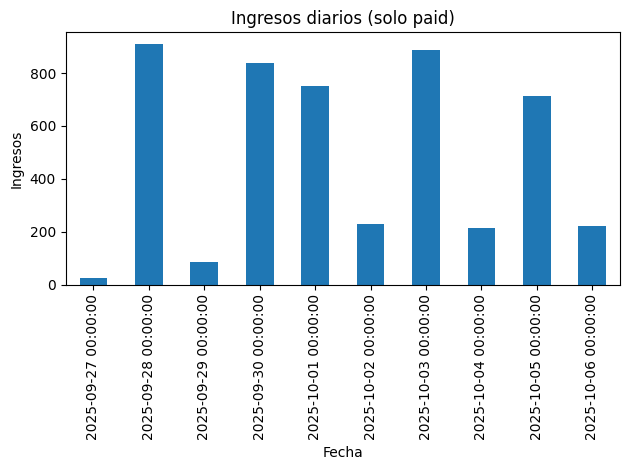

In [28]:
ax = daily_rev.plot(kind="bar", title="Ingresos diarios (solo paid)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ingresos")
plt.tight_layout()
plt.show()

# 4- GRAFICA 2: PEDIDOS POR PAIS

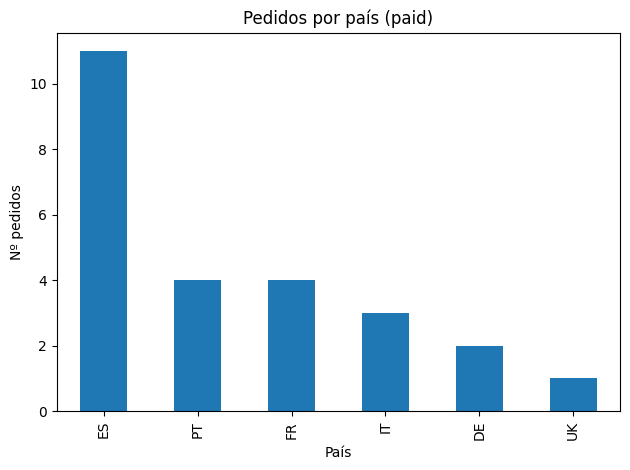

In [30]:
paid_country_counts = df_paid["country"].value_counts()
ax = paid_country_counts.plot(kind="bar", title="Pedidos por país (paid)")
ax.set_xlabel("País")
ax.set_ylabel("Nº pedidos")
plt.tight_layout()
plt.show()


# 5- FLITROS + KPIS MANUALES

In [48]:
start = "2025-09-28"   
end   = "2025-10-05"   
country = "ES"         

mask = (
    (df["date"] >= pd.to_datetime(start)) &   
    (df["date"] <= pd.to_datetime(end)) &   
    (df["country"] == country)                
)

sub = df[mask].copy()
sub_paid = sub[ sub["status"] == "paid" ].copy()

num_orders = sub_paid.shape[0] # TODO: nº filas
total_revenue = sum(sub_paid["units"]*sub_paid["unit_price"]) # TODO: suma de units * unit_price en sub_paid
if num_orders > 0:
    avg_order_value = total_revenue / num_orders
else:
    avg_order_value = 0

(num_orders, total_revenue, avg_order_value)

(9, 2480.0, 275.55555555555554)

# 6- MARKDOWN: REGLAS ACORDADAS

### Reglas acordadas

* Filtros aplicables: `start`, `end`, `country`.
* Los KPIs se calculan **solo con `status="paid"`**.
* Los valores numéricos se redondean a **2 decimales**.
* Si `num_orders == 0`, entonces `avg_order_value = 0.0`.